### 사전준비

In [83]:
# 기본적인 패키지 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# 한글 / 차트 마이너스
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='NanumSquare')
sns.set(font='NanumSquare', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션 MNIST 데이터

#### 데이터 로드

In [85]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [86]:
(train_input, train_target), (test_input, test_target) = load_data()

In [87]:
train_scaled = train_input / 255.0

In [88]:
train_scaled, var_scaled, train_target, var_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [89]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28, 28)))   # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))    # 히든 레이어

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [90]:
# 함수 사용 예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [91]:
# 함수 사용 예
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 2s - loss: 0.5368 - accuracy: 0.8112 - 2s/epoch - 1ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3953 - accuracy: 0.8592 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3572 - accuracy: 0.8719 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3350 - accuracy: 0.8795 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3204 - accuracy: 0.8845 - 2s/epoch - 1ms/step


In [93]:
history.history     # epoch 돌때마다 변하는것을 차트로 그릴 수 있다

{'loss': [0.5368476510047913,
  0.39530766010284424,
  0.3572085499763489,
  0.33504360914230347,
  0.3203870952129364],
 'accuracy': [0.8111666440963745,
  0.8592291474342346,
  0.871916651725769,
  0.8795416951179504,
  0.8845208287239075]}

#### 손실곡선 차트 / 정확도 차트

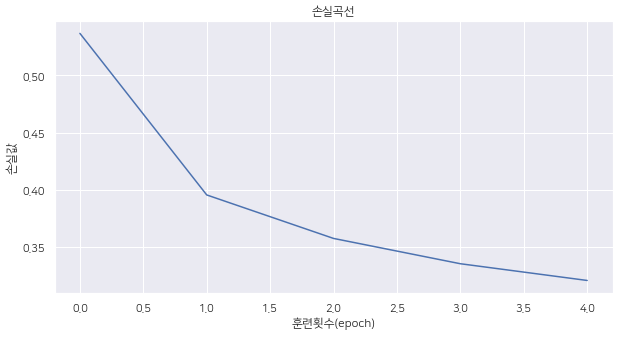

In [94]:
plt.figure(figsize=(10, 5))
plt.title('손실곡선')

plt.plot(history.history['loss'])
plt.xlabel('훈련횟수(epoch)')
plt.ylabel('손실값')

plt.show()

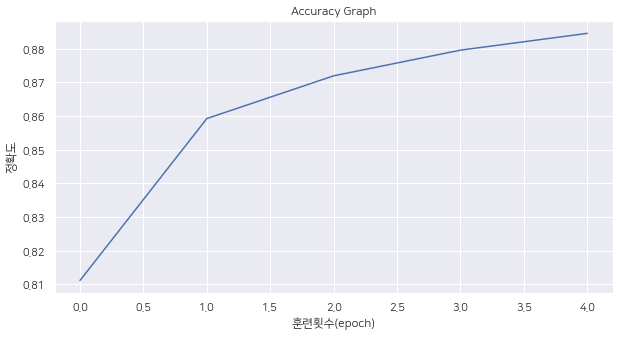

In [95]:
plt.figure(figsize=(10, 5))
plt.title('Accuracy Graph')

plt.plot(history.history['accuracy'])
plt.xlabel('훈련횟수(epoch)')
plt.ylabel('정확도')

plt.show()

#### 에포크 20번 훈련

In [96]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5315 - accuracy: 0.8126
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3918 - accuracy: 0.8597
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3540 - accuracy: 0.8737
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3324 - accuracy: 0.8810
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3166 - accuracy: 0.8863
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3060 - accuracy: 0.8909
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2948 - accuracy: 0.8960
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2901 - accuracy: 0.8978
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2810 - accuracy: 0.9015
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.272

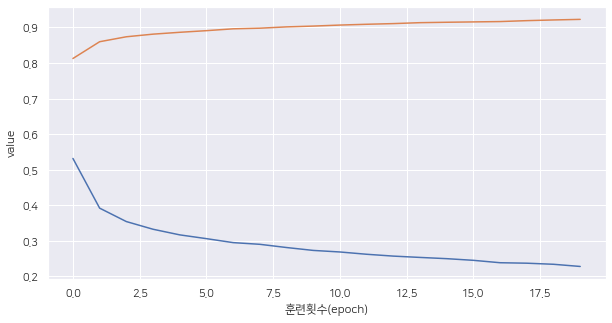

In [97]:
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('훈련횟수(epoch)')
plt.ylabel('value')

plt.show()

#### 검증손실
훈련세트 훈련 → 정확도 92%

In [98]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                     validation_data=(var_scaled, var_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5236 - accuracy: 0.8145 - val_loss: 0.4269 - val_accuracy: 0.8487
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3906 - accuracy: 0.8600 - val_loss: 0.3717 - val_accuracy: 0.8727
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3542 - accuracy: 0.8726 - val_loss: 0.3928 - val_accuracy: 0.8610
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3324 - accuracy: 0.8817 - val_loss: 0.3700 - val_accuracy: 0.8752
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3165 - accuracy: 0.8861 - val_loss: 0.3795 - val_accuracy: 0.8717
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3056 - accuracy: 0.8898 - val_loss: 0.3782 - val_accuracy: 0.8779
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8953 - val_loss: 0.4555 - val_accuracy:

In [99]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트 / 검증세트 비교

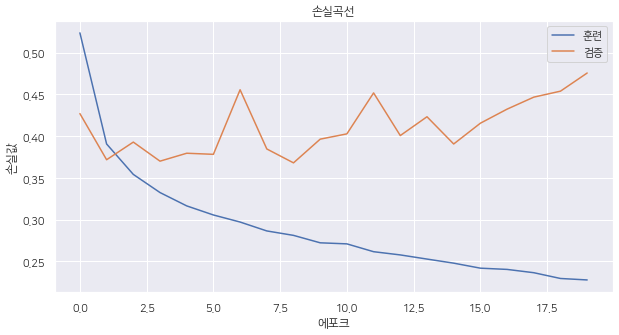

In [100]:
plt.figure(figsize=(10, 5))
plt.title('손실곡선')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])

plt.show()

#### 드롭아웃

In [101]:
model2 = model_fn(keras.layers.Dropout(0.3))
model2.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [102]:
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model2.fit(train_scaled, train_target, epochs=20,
                    validation_data=(var_scaled, var_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5853 - accuracy: 0.7940 - val_loss: 0.4245 - val_accuracy: 0.8476
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4390 - accuracy: 0.8421 - val_loss: 0.3888 - val_accuracy: 0.8575
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4023 - accuracy: 0.8542 - val_loss: 0.3576 - val_accuracy: 0.8694
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3818 - accuracy: 0.8607 - val_loss: 0.3607 - val_accuracy: 0.8703
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3644 - accuracy: 0.8675 - val_loss: 0.3506 - val_accuracy: 0.8721
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3540 - accuracy: 0.8696 - val_loss: 0.3474 - val_accuracy: 0.8761
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3420 - accuracy: 0.8744 - val_loss: 0.3391 - val_accuracy:

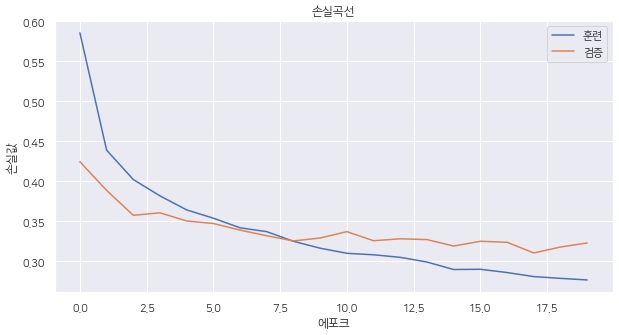

In [103]:
plt.figure(figsize=(10, 5))
plt.title('손실곡선')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])

plt.show()

#### 모델 저장 / 로드

In [104]:
# 훈련된 가중치만 저장
model2.save_weights('../data/model-weights.h5')

In [105]:
# 훈련된 전체데이터 저장
model2.save('../data/best_model.h5')

##### 가중치 모델 로드

In [106]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('../data/model-weights.h5')

In [107]:
# 가중치만 불러왔기 때문에 evaluate가 안 됨
model.evaluate(var_scaled, var_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

##### 전체 모델 로드

In [108]:
model = keras.models.load_model('../data/best_model.h5')
model.evaluate(var_scaled, var_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3231 - accuracy: 0.8885


[0.3231373727321625, 0.8884999752044678]

가중치만 저장하면 모델 기능에 제약이 있다. 모델 전체 데이터를 저장하면 모든 기능을 수행할 수 있다.

In [109]:
model.predict(var_scaled)

375/375 [==============================] - 0s 1ms/step


array([[1.14678015e-13, 1.56922938e-22, 1.88360805e-17, ...,
        4.44706655e-15, 1.00000000e+00, 6.18516031e-19],
       [6.94389769e-07, 6.84697230e-17, 2.51344900e-08, ...,
        5.12386832e-15, 9.99998569e-01, 2.59292587e-13],
       [4.08029133e-13, 4.27689188e-13, 9.03452042e-19, ...,
        9.99944091e-01, 5.36532971e-11, 6.20716207e-08],
       ...,
       [7.26485837e-07, 2.16889668e-15, 1.29392630e-09, ...,
        8.66351324e-10, 9.99999166e-01, 2.71102980e-08],
       [8.79388489e-12, 7.86906247e-22, 1.84228880e-13, ...,
        1.72195248e-19, 1.00000000e+00, 1.00216990e-21],
       [3.03398281e-01, 2.24354358e-06, 8.62666420e-05, ...,
        2.61028908e-04, 1.06461914e-04, 8.55317048e-04]], dtype=float32)

In [110]:
### 예측결과
val_labels = np.argmax(model.predict(var_scaled), axis=-1)
np.mean(val_labels == var_target)

375/375 [==============================] - 0s 1ms/step


0.8885

#### 콜백(callback)

In [111]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [112]:
# 베스트 모델을 저장할 콜백
# save_best_only=True 를 써야 가장 좋은 모델이 저장됨
checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(var_scaled, var_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5926 - accuracy: 0.7937 - val_loss: 0.4306 - val_accuracy: 0.8433
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4429 - accuracy: 0.8413 - val_loss: 0.3917 - val_accuracy: 0.8588
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4050 - accuracy: 0.8527 - val_loss: 0.3681 - val_accuracy: 0.8640
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3849 - accuracy: 0.8597 - val_loss: 0.3638 - val_accuracy: 0.8653
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3656 - accuracy: 0.8680 - val_loss: 0.3519 - val_accuracy: 0.8711
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3548 - accuracy: 0.8702 - val_loss: 0.3416 - val_accuracy: 0.8762
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3459 - accuracy: 0.8721 - val_loss: 0.3301 - val_accuracy:

In [113]:
# 체크포인트 확인
model = keras.models.load_model('../data/best_model.h5')
model.evaluate(var_scaled, var_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3164 - accuracy: 0.8899


[0.31641367077827454, 0.8899166584014893]

#### 조기종료

In [114]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(var_scaled, var_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1480/1500 [============================>.] - ETA: 0s - loss: 0.5962 - accuracy: 0.7893
Epoch 1: val_loss improved from inf to 0.41982, saving model to ../data\best_model.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5940 - accuracy: 0.7901 - val_loss: 0.4198 - val_accuracy: 0.8503
Epoch 2/20
1491/1500 [============================>.] - ETA: 0s - loss: 0.4367 - accuracy: 0.8439
Epoch 2: val_loss improved from 0.41982 to 0.39472, saving model to ../data\best_model.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4372 - accuracy: 0.8436 - val_loss: 0.3947 - val_accuracy: 0.8553
Epoch 3/20
1472/1500 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8539
Epoch 3: val_loss improved from 0.39472 to 0.37950, saving model to ../data\best_model.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4018 - accuracy: 0.8537 - val_loss: 0.3795 - val_accuracy: 0.8630
Epoch 4/20
1489/1500 [===================

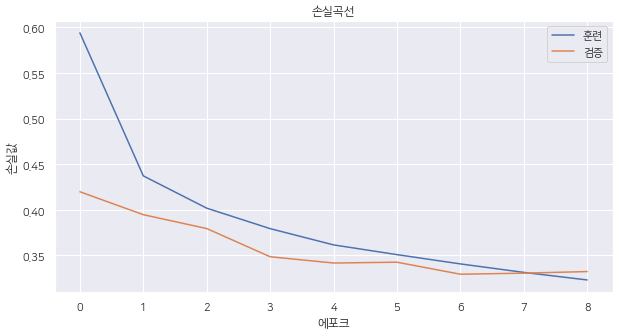

In [115]:
plt.figure(figsize=(10, 5))
plt.title('손실곡선')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증'])

plt.show()

In [116]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch

8

In [117]:
model.evaluate(var_scaled, var_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3295 - accuracy: 0.8824


[0.32946550846099854, 0.8824166655540466]

In [118]:
### 예측결과
val_labels = np.argmax(model.predict(var_scaled), axis=-1)
np.mean(val_labels == var_target)

375/375 [==============================] - 0s 1ms/step


0.8824166666666666

In [119]:
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)